# SOMs testing with model M5b

This notebook test SOMs with the following set of parameter.

dim = 40
<br />iter_cnt = 3700
<br />learning rate = 0.341101 
<br />sigma = 1.896552


In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")
from acse_9_irp_wafflescore import MiscHelpers as mh
from acse_9_irp_wafflescore import SOMsHelpers as sh
from acse_9_irp_wafflescore import FCMHelpers as fh
from acse_9_irp_wafflescore import dataPreprocessing as dp

import numpy as np
from timeit import default_timer as timer

import logging
import sys

logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s',
                     level=logging.INFO, stream=sys.stdout)

# Tested with model with smaller anomaly (M5b)

In [2]:
model = 'M5b'

pdir = '../data/' + model + '_xz_pos.npy'
xz_pos = np.load(pdir)
x = xz_pos[:, 0]
z = xz_pos[:, 1]

ldir = '../data/' + model + '_data_label.npy'
label = np.load(ldir)

cdir = '../data/' + model + '_clean_data.npy'
data = np.load(cdir)

ddir = '../data/' + model + '_init_data.npy'
idata = np.load(cdir)

In [3]:
means, stds = dp.compMeanStd(data)
norm_data = dp.normalize(data, means, stds)[:,:-2]

In [4]:
dim, iter_cnt, lr, sigma = (40, 3700, 0.341101, 1.896552)
som, cluster_labels = sh.run_SOMs(norm_data, dim, iter_cnt, lr, sigma)
n_map = som.neuron_map(norm_data)

2019-08-30 04:42:26,764 | INFO : Not enough labeled neighbor to perform KNN.
                      Will return the original inputted value.


/anaconda3/lib/python3.6/site-packages/skimage/segmentation/random_walker_segmentation.py:407: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  warn('Random walker only segments unlabeled areas, where '


The number of cluster is too low, n_cluster = 1 
Return an average score of -1 by default.


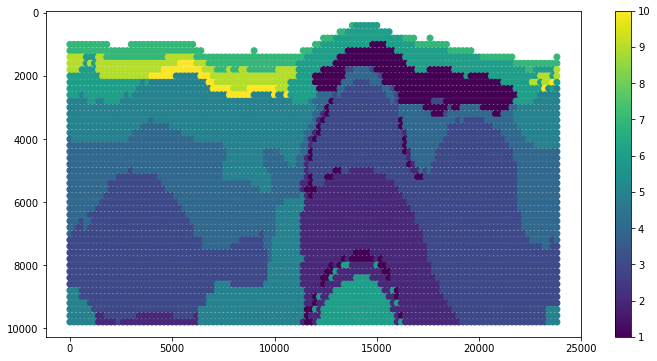

In [5]:
for c in cluster_labels:
    mh.plot_e_model(c, x, z)

The first result seems to be better, though does not represent the Earth model that well.

Still, we will experiment this result with other clustering methods to see the difference.

# SOMs with application of HDBScan
Since SOMs is a neural network that generates a u-matrix, this matrix could then be used as an input for other classification method.

## SOMs with HDBScan

In [6]:
from acse_9_irp_wafflescore import HDBScanHelpers as hp
import hdbscan

In [7]:
# parameter Tuning
cluster_labels, avg_sils, avg_ch, min_size, min_sam = hp.random_search_hdb(n_map, (20,5), max_eval=20, rand_range=(50,50))

2019-08-30 04:48:58,985 | INFO : Random search using min_size = 41, min_sam = 7 result to very small / large number of clusters (n_clusters = 3)
2019-08-30 04:48:59,800 | INFO : min_size=32, min_sam=35, sil=0.078917, ch=1003.981882
2019-08-30 04:48:59,916 | INFO : Random search using min_size = 41, min_sam = 5 result to very small / large number of clusters (n_clusters = 3)
2019-08-30 04:49:00,700 | INFO : min_size=18, min_sam=34, sil=-0.074817, ch=643.467190
2019-08-30 04:49:01,429 | INFO : min_size=36, min_sam=22, sil=-0.064505, ch=616.300760
2019-08-30 04:49:01,551 | INFO : Random search using min_size = 46, min_sam = 15 result to very small / large number of clusters (n_clusters = 4)
2019-08-30 04:49:01,691 | INFO : Random search using min_size = 7, min_sam = 38 result to very small / large number of clusters (n_clusters = 37)
2019-08-30 04:49:01,811 | INFO : Random search using min_size = 36, min_sam = 25 result to very small / large number of clusters (n_clusters = 3)
2019-08-30 

min_size, min_sample: 52.0 28.0
silhouette score: 0.0758605311190783
calinski harabaz score: 1126.6853341851197


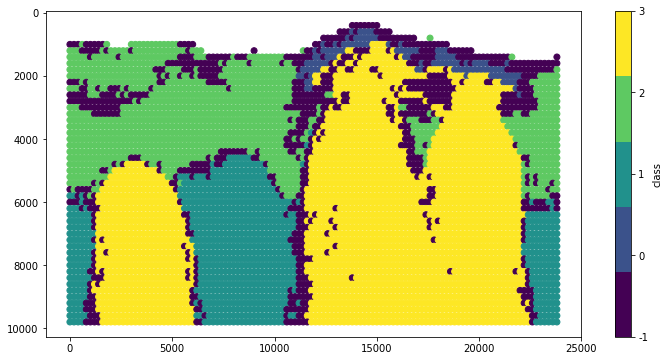

min_size, min_sample: 40.0 33.0
silhouette score: 0.0798346498819736
calinski harabaz score: 955.6120525246216


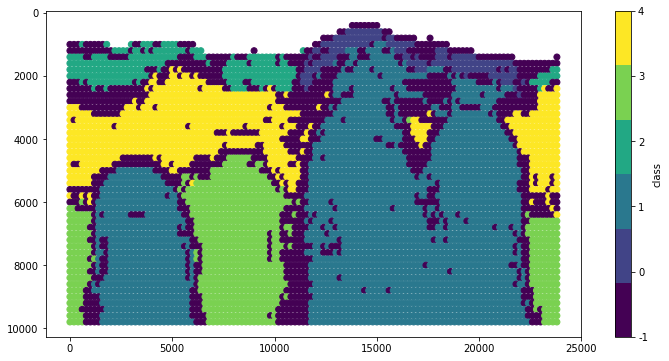

In [8]:
for i in range(cluster_labels.shape[0]):
    print("min_size, min_sample:", min_size[i], min_sam[i])
    print("silhouette score:", avg_sils[i])
    print("calinski harabaz score:", avg_ch[i])
    mh.plot_e_model(cluster_labels[i], x, z, sep_label=True)

min_size, min_sample: 52.0 28.0
silhouette score: 0.0758605311190783
calinski harabaz score: 1126.6853341851197


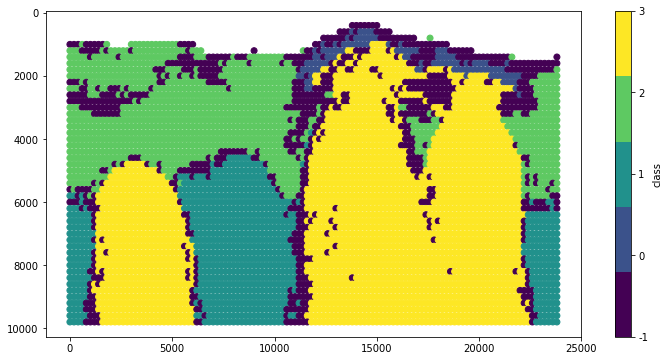

min_size, min_sample: 40.0 33.0
silhouette score: 0.0798346498819736
calinski harabaz score: 955.6120525246216


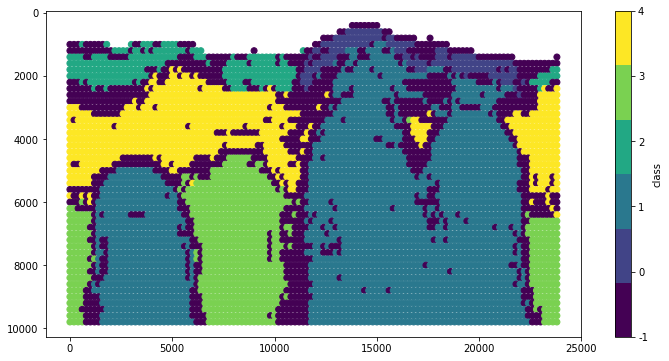

In [9]:
for i in range(cluster_labels.shape[0]):
    print("min_size, min_sample:", min_size[i], min_sam[i])
    print("silhouette score:", avg_sils[i])
    print("calinski harabaz score:", avg_ch[i])
    mh.plot_e_model(cluster_labels[i], x, z, sep_label=True)

# SOMs with Fuzzy C Mean

2019-08-30 05:03:36,628 | INFO : FCM elapsed time: 21.727713
2019-08-30 05:03:37,356 | INFO : sil=0.351641, chs=5034.816515
2019-08-30 05:04:50,980 | INFO : FCM elapsed time: 73.622239
2019-08-30 05:04:51,582 | INFO : sil=0.367885, chs=5739.178560
2019-08-30 05:07:16,147 | INFO : FCM elapsed time: 144.563256
2019-08-30 05:07:16,854 | INFO : sil=0.346112, chs=5406.807013
2019-08-30 05:10:22,911 | INFO : FCM elapsed time: 186.054660
2019-08-30 05:10:23,533 | INFO : sil=0.298877, chs=4917.725628


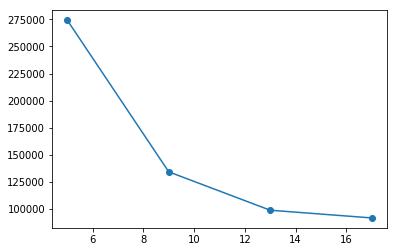

In [10]:
n_classes = range(5, 20, 4)
fcms, pred_mems, SSE, avg_sils, ch_scs, best_idx = fh.iter_n_class(n_map, n_classes)

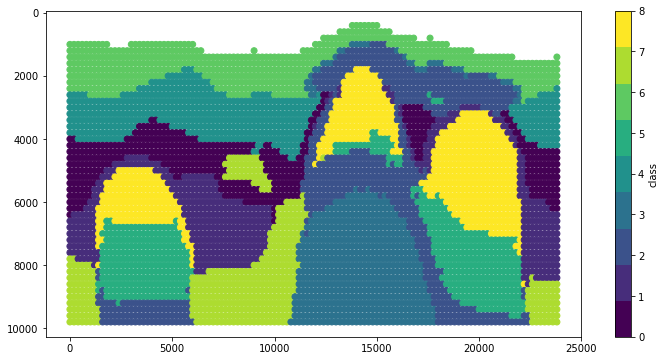

In [11]:
for i, p in enumerate(pred_mems):
    if(i in best_idx):
        fh.plot_best_fuzz(p, x, z)

# SOMs with K-mean clustering


2019-08-30 05:10:24,723 | INFO : sil=0.409203, chs=5745.576128
2019-08-30 05:10:25,368 | INFO : sil=0.400063, chs=6009.116566
2019-08-30 05:10:26,042 | INFO : sil=0.399624, chs=5995.636573
2019-08-30 05:10:26,694 | INFO : sil=0.406098, chs=6154.653063
2019-08-30 05:10:27,327 | INFO : sil=0.396967, chs=6204.464419
2019-08-30 05:10:28,031 | INFO : sil=0.407365, chs=6261.597794
2019-08-30 05:10:28,719 | INFO : sil=0.404363, chs=6428.104946
2019-08-30 05:10:29,405 | INFO : sil=0.404797, chs=6442.983407
2019-08-30 05:10:30,112 | INFO : sil=0.396795, chs=6545.317991
2019-08-30 05:10:30,917 | INFO : sil=0.393790, chs=6629.835922
2019-08-30 05:10:31,907 | INFO : sil=0.386485, chs=6689.730029
2019-08-30 05:10:33,285 | INFO : sil=0.383647, chs=6664.832862
2019-08-30 05:10:33,979 | INFO : sil=0.383319, chs=6674.895519
2019-08-30 05:10:34,950 | INFO : sil=0.376256, chs=6635.788765
2019-08-30 05:10:36,262 | INFO : sil=0.385474, chs=6777.062014


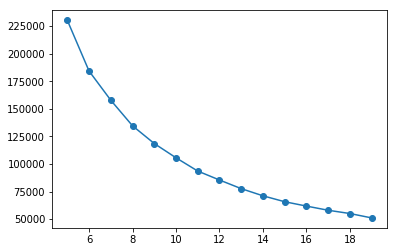

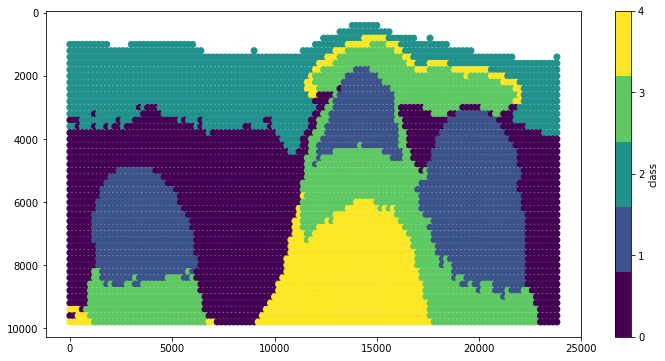

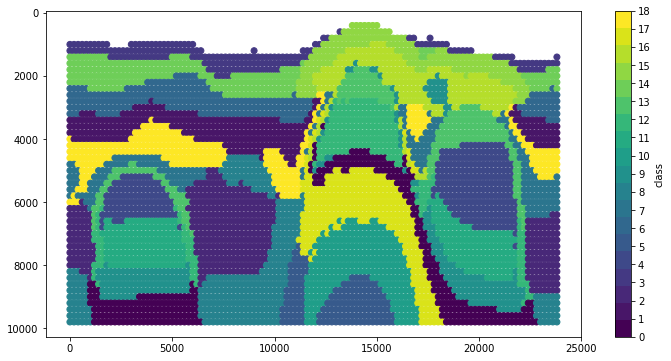

In [12]:
in_range = range(5, 20)
cluster_labels, avg_sils, ch_scs, SSE, best_idx = mh.iter_kmean(n_map, in_range)

for c in cluster_labels[best_idx]:
    mh.plot_e_model(c, x, z, sep_label=True)